In [35]:
# Descarga tu repositorio desde GitHub
#!git clone git@github.com:Guesseppe100/Perceptron.git


Configuración: h1=4, h2=2
Accuracy final: 50.00%


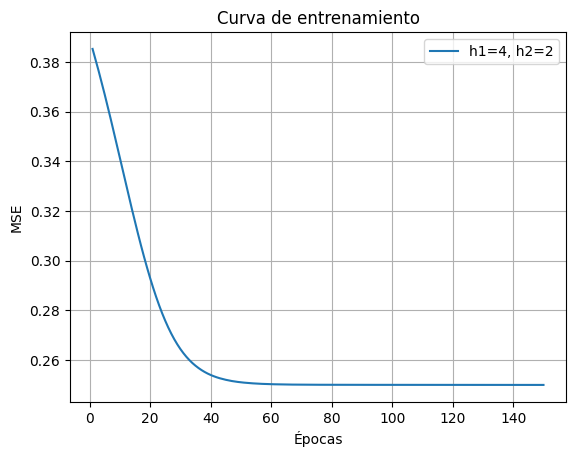

In [36]:
import numpy as np
import matplotlib.pyplot as plt

# =========================
# 1) DATOS (tus datos)
# =========================
x1 = np.array([0.1,0.3,0.1,0.6,0.4,0.6,0.5,0.9,0.4,0.7]) 
x2 = np.array([0.1,0.4,0.5,0.9,0.2,0.3,0.6,0.2,0.4,0.6]) 
X = np.vstack((x1,x2)).T   # (10,2)

y1 = np.hstack([np.ones(5), np.zeros(5)])
y2 = np.hstack([np.zeros(5), np.ones(5)])
Y = np.vstack((y1,y2)).T   # (10,2)

# =========================
# 2) HIPERPARÁMETROS
# =========================
h1 = 4   # neuronas capa oculta 1
h2 = 2   # neuronas capa oculta 2
eta = 0.05
epochs = 150
seed = 0

in_dim  = X.shape[1]
out_dim = Y.shape[1]

# =========================
# 3) INICIALIZACIÓN
# =========================
rng = np.random.default_rng(seed)
W2 = rng.uniform(0, 1, (h1, in_dim))
b2 = rng.uniform(0, 1, (h1, 1))
W3 = rng.uniform(0, 1, (h2, h1))
b3 = rng.uniform(0, 1, (h2, 1))
W4 = rng.uniform(0, 1, (out_dim, h2))
b4 = rng.uniform(0, 1, (out_dim, 1))

# =========================
# 4) FUNCIONES AUXILIARES
# =========================
def sigmoid(z):
    z = np.clip(z, -60, 60)
    return 1.0 / (1.0 + np.exp(-z))

def forward(x, W2, b2, W3, b3, W4, b4):
    a2 = sigmoid(W2 @ x + b2)
    a3 = sigmoid(W3 @ a2 + b3)
    a4 = sigmoid(W4 @ a3 + b4)
    return a2, a3, a4

def mse_loss(X, Y, W2, b2, W3, b3, W4, b4):
    total = 0.0
    for i in range(len(X)):
        xi = X[i].reshape(-1, 1)
        yi = Y[i].reshape(-1, 1)
        _, _, a4 = forward(xi, W2, b2, W3, b3, W4, b4)
        total += np.mean((yi - a4) ** 2)
    return total / len(X)

def accuracy(X, Y, W2, b2, W3, b3, W4, b4):
    correct = 0
    for i in range(len(X)):
        xi = X[i].reshape(-1, 1)
        yi = Y[i]
        _, _, a4 = forward(xi, W2, b2, W3, b3, W4, b4)
        pred = np.argmax(a4.ravel())
        if pred == np.argmax(yi):
            correct += 1
    return correct / len(X)

# =========================
# 5) ENTRENAMIENTO
# =========================
losses = []
rng_epoch = np.random.default_rng(seed)

for epoch in range(epochs):
    idx = rng_epoch.permutation(len(X))
    for i in idx:
        x = X[i].reshape(-1, 1)
        y = Y[i].reshape(-1, 1)

        # Forward
        a2 = sigmoid(W2 @ x + b2)
        a3 = sigmoid(W3 @ a2 + b3)
        a4 = sigmoid(W4 @ a3 + b4)

        # Backward
        delta4 = (a4 - y) * a4 * (1 - a4)
        delta3 = (W4.T @ delta4) * a3 * (1 - a3)
        delta2 = (W3.T @ delta3) * a2 * (1 - a2)

        # Actualización
        W4 -= eta * (delta4 @ a3.T)
        b4 -= eta * delta4
        W3 -= eta * (delta3 @ a2.T)
        b3 -= eta * delta3
        W2 -= eta * (delta2 @ x.T)
        b2 -= eta * delta2

    # Pérdida por época
    losses.append(mse_loss(X, Y, W2, b2, W3, b3, W4, b4))

# =========================
# 6) REPORTE Y GRÁFICAS
# =========================
acc = accuracy(X, Y, W2, b2, W3, b3, W4, b4)
print(f"Configuración: h1={h1}, h2={h2}")
print(f"Accuracy final: {acc*100:.2f}%")

plt.plot(range(1, epochs + 1), losses, label=f"h1={h1}, h2={h2}")
plt.xlabel("Épocas")
plt.ylabel("MSE")
plt.title("Curva de entrenamiento")
plt.legend()
plt.grid(True)
plt.show()


In [40]:
# =========================
# AÑADIDOS PARA EVALUACIÓN
# =========================
%pip install scikit-learn

from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    confusion_matrix, accuracy_score, precision_score, recall_score,
    f1_score, fbeta_score, classification_report, roc_curve, auc
)

# -------- 1) Split train/test (estratificado) --------
# y_bin: etiquetas 0/1 a partir del one-hot
y_bin = np.argmax(Y, axis=1)
X_train, X_test, Y_train, Y_test, y_train_bin, y_test_bin = train_test_split(
    X, Y, y_bin, test_size=0.3, random_state=42, stratify=y_bin
)

# -------- 2) ENTRENAMIENTO con TU CÓDIGO original pero sobre X_train/Y_train --------
# (reutilizamos tus variables W2,b2,W3,b3,W4,b4 ya inicializadas)
losses = []
rng_epoch = np.random.default_rng(seed)

for epoch in range(epochs):
    idx = rng_epoch.permutation(len(X_train))
    for i in idx:
        x = X_train[i].reshape(-1, 1)
        y = Y_train[i].reshape(-1, 1)

        # Forward (como en tu código)
        a2 = sigmoid(W2 @ x + b2)
        a3 = sigmoid(W3 @ a2 + b3)
        a4 = sigmoid(W4 @ a3 + b4)

        # Backward (como en tu código)
        delta4 = (a4 - y) * a4 * (1 - a4)
        delta3 = (W4.T @ delta4) * a3 * (1 - a3)
        delta2 = (W3.T @ delta3) * a2 * (1 - a2)

        # Actualización (como en tu código)
        W4 -= eta * (delta4 @ a3.T)
        b4 -= eta * delta4
        W3 -= eta * (delta3 @ a2.T)
        b3 -= eta * delta3
        W2 -= eta * (delta2 @ x.T)
        b2 -= eta * delta2

    # Pérdida por época (usa TRAIN para el registro)
    losses.append(mse_loss(X_train, Y_train, W2, b2, W3, b3, W4, b4))

# -------- 3) PREDICCIONES EN TEST --------
y_true = []
y_pred = []
y_score_pos = []  # score continuo para ROC (probabilidad o similar)

for i in range(len(X_test)):
    xi = X_test[i].reshape(-1, 1)
    yi = Y_test[i]
    _, _, a4 = forward(xi, W2, b2, W3, b3, W4, b4)

    # etiqueta verdadera 0/1 desde one-hot
    y_true.append(np.argmax(yi))
    # predicción discreta por argmax
    y_pred.append(np.argmax(a4.ravel()))
    # score positivo = salida de la clase 1 (segunda neurona)
    y_score_pos.append(float(a4.ravel()[1]))

y_true = np.array(y_true)
y_pred = np.array(y_pred)
y_score_pos = np.array(y_score_pos)

# -------- 4) MÉTRICAS CLAVE --------
# Confusion Matrix
cm = confusion_matrix(y_true, y_pred, labels=[0,1])
TN, FP, FN, TP = cm.ravel()  # para binario con labels=[0,1]

print("=== CONFUSION MATRIX (labels: 0,1) ===")
print(cm)
print(f"TN={TN}, FP={FP}, FN={FN}, TP={TP}\n")

# Accuracy
acc = accuracy_score(y_true, y_pred)
print(f"Accuracy: {acc:.4f}")

# Precision, Recall, F1 (clase positiva = 1)
prec = precision_score(y_true, y_pred, pos_label=1)
rec  = recall_score(y_true, y_pred,    pos_label=1)
f1   = f1_score(y_true, y_pred,        pos_label=1)
print(f"Precision: {prec:.4f}")
print(f"Recall:    {rec:.4f}")
print(f"F1-score:  {f1:.4f}")

# F-beta (ajusta beta según tu interés)
beta = 0.5  # <1 prioriza precisión; >1 prioriza recall
f_beta = fbeta_score(y_true, y_pred, beta=beta, pos_label=1)
print(f"F-beta (beta={beta}): {f_beta:.4f}\n")

# Reporte por clas


   ---------------------------------------- 0.0/11.2 MB ? eta -:--:--
   -- ------------------------------------- 0.7/11.2 MB 14.9 MB/s eta 0:00:01
   -------- ------------------------------- 2.5/11.2 MB 26.8 MB/s eta 0:00:01
   ---------------- ----------------------- 4.5/11.2 MB 35.6 MB/s eta 0:00:01
   ----------------------- ---------------- 6.7/11.2 MB 39.0 MB/s eta 0:00:01
   ----------------------------- ---------- 8.1/11.2 MB 39.8 MB/s eta 0:00:01
   ---------------------------------------  10.9/11.2 MB 46.7 MB/s eta 0:00:01
   ---------------------------------------  11.2/11.2 MB 46.7 MB/s eta 0:00:01
   ---------------------------------------  11.2/11.2 MB 46.7 MB/s eta 0:00:01
   ---------------------------------------  11.2/11.2 MB 46.7 MB/s eta 0:00:01
   ---------------------------------------- 11.2/11.2 MB 27.3 MB/s eta 0:00:00
   ---------------------------------------- 0.0/308.4 kB ? eta -:--:--
   ---------------------------------------- 308.4/308.4 kB ? eta 0:00:00
N